In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
# Import necessary libraries
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\REBU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\REBU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
print(stop_words)

{'myself', "mightn't", 'an', 'when', 'under', 'yourself', 'haven', 'should', 'them', 'couldn', 'such', 'because', "haven't", 'be', 'the', 'shouldn', 'does', 'above', 'below', 'over', 'as', 'to', 'nor', 'up', 'him', 'those', 'other', 'here', "didn't", 'these', 'being', "don't", 'd', 'again', 'isn', "should've", "wasn't", 'no', "mustn't", 'now', "hasn't", 've', 'whom', 'out', 'did', 'there', "that'll", 'ma', 'in', 'i', 'off', 'not', 'your', 'on', 'through', 'you', 'she', 's', 'after', "doesn't", 'a', 'so', 'o', 'didn', 'once', 'down', 'himself', 'ain', "you've", 'if', 'until', 'further', 'has', 'ourselves', 'hasn', "shouldn't", 'do', 'some', 'at', 'can', 'of', 'just', 'y', 'been', 'me', 'her', "you'll", 'this', "couldn't", 'all', 'is', 'doesn', 'mustn', 'against', 'mightn', 'their', 'why', 'were', 'few', 'most', 'ours', 'm', 'shan', 'where', 'don', 'between', 'will', 'more', "you're", 'he', 'theirs', 'own', "won't", 'needn', 'which', 'his', 'then', 're', 'or', 'my', 'are', 'how', 'only',

In [4]:
# Load datasets
train_df = pd.read_csv(r'c:\Users\REBU\Downloads\train_p.csv')
test_df = pd.read_csv(r'c:\Users\REBU\Downloads\test_p.csv')


In [5]:
#Encode the table
label = {'bad':0, 'good':1}
train_df['label'] = train_df['label'].map(label)

In [6]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    25000 non-null  int64 
 1   movie_id      25000 non-null  object
 2   movie_rating  25000 non-null  int64 
 3   review        25000 non-null  object
 4   label         25000 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 976.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25000 non-null  int64 
 1   review      25000 non-null  object
 2   label       25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [7]:
train_df.describe()

,Unnamed: 0,movie_rating,label
count,25000.000000,25000.000000,25000.00000
mean,12499.500000,5.477720,0.50000
std,7217.022701,3.466477,0.50001
min,0.000000,1.000000,0.00000
25%,6249.750000,2.000000,0.00000
50%,12499.500000,5.500000,0.50000
75%,18749.250000,9.000000,1.00000
max,24999.000000,10.000000,1.00000


In [8]:
# Checking for null values on the train dataset

train_df.isnull().sum()

Unnamed: 0      0
movie_id        0
movie_rating    0
review          0
label           0
dtype: int64

In [10]:
def preprocess_text(text):
    text = text.lower() # converting to lowercase

    # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that's",'that is',text)
    text=re.sub("I'm",'I am',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("he's'",'he is',text)
    text=re.sub("I'm",'I am',text)
    text=re.sub("I'd",'I did',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("didn't",'did not',text)
    
    text = re.sub('https?://\S+|www\.\S+', ' ', text) # removing URL links
    text = re.sub(r"\b\d+\b", " ", text) # removing number 
    text = re.sub('<.*?>+', ' ', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', ' ', text)
    text = re.sub('[’“”…]', ' ', text)
    
    return text

In [11]:
# Download the punkt tokenizer for sentence splitting
nltk.download('punkt')

# Download the stopwords dataset
nltk.download('stopwords')

# Download the wordnet resource
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\REBU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\REBU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\REBU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Use the created function to apply preprocessing techniques on the reviews
train_df['review'] = train_df['review'].apply(preprocess_text)

In [13]:
train_df['no_sw'] = train_df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [14]:
train_df

,Unnamed: 0,movie_id,movie_rating,review,label,no_sw
0,0,tt0064354,3,story man unnatural feeling pig start opening ...,0,story man unnatural feeling pig start opening ...
1,1,tt0100680,1,robert deniro play unbelievably intelligent il...,0,robert deniro play unbelievably intelligent il...
2,2,tt0100680,1,saw capsule comment said great acting opinion ...,0,saw capsule comment said great acting opinion ...
3,3,tt0100680,4,read pat barker union street seeing film would...,0,read pat barker union street seeing film would...
4,4,tt0047200,4,fanciful horror flick vincent price playing ma...,0,fanciful horror flick vincent price playing ma...
...,...,...,...,...,...,...
24995,24995,tt0433360,7,whats good inventive genuinely creepy little e...,1,whats good inventive genuinely creepy little e...
24996,24996,tt0433360,8,year weve watching every horror film come dull...,1,year weve watching every horror film come dull...
24997,24997,tt0324532,10,havent already seen movie marykate ashleys say...,1,havent already seen movie marykate ashleys say...
24998,24998,tt0324532,10,movie best movie ever lot live action great ev...,1,movie best movie ever lot live action great ev...


In [15]:
test_df['no_sw'] = test_df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [16]:
test_df

,Unnamed: 0,review,label,no_sw
0,0,mr costner dragged movie far longer necessary ...,bad,mr costner dragged movie far longer necessary ...
1,1,example majority action film generic boring th...,bad,example majority action film generic boring re...
2,2,first hate moronic rapper couldnt act gun pres...,bad,first hate moronic rapper couldnt act gun pres...
3,3,even beatles could write song everyone liked a...,bad,even beatles could write song everyone liked a...
4,4,brass picture movie fitting word really somewh...,bad,brass picture movie fitting word really somewh...
...,...,...,...,...
24995,24995,extraordinarily impressed film one best sport ...,good,extraordinarily impressed film one best sport ...
24996,24996,although im golf fan attended sneak preview mo...,good,although im golf fan attended sneak preview mo...
24997,24997,start edge love viewer transported striking wo...,good,start edge love viewer transported striking wo...
24998,24998,movie complexity subtlety make one thoughtprov...,good,movie complexity subtlety make one thoughtprov...


In [17]:
#sentiment count: 
train_df['label'].value_counts()

label
0    12500
1    12500
Name: count, dtype: int64

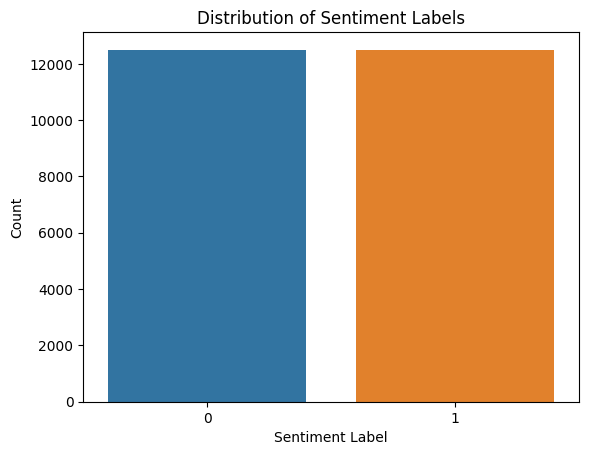

In [18]:
# Distribution of sentiment labels(0 or 1)
sns.countplot(data=train_df, x='label')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='movie_rating'>

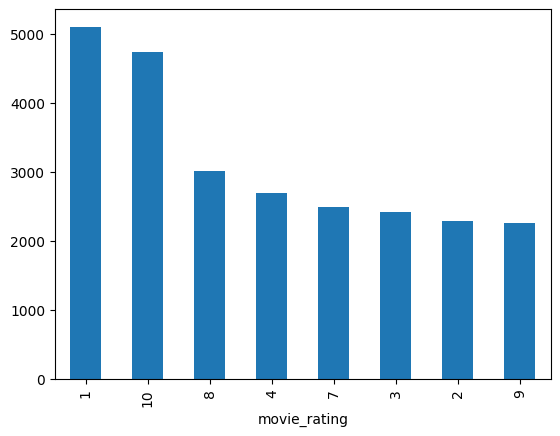

In [19]:
train_df['movie_rating'].value_counts().plot(kind = 'bar')

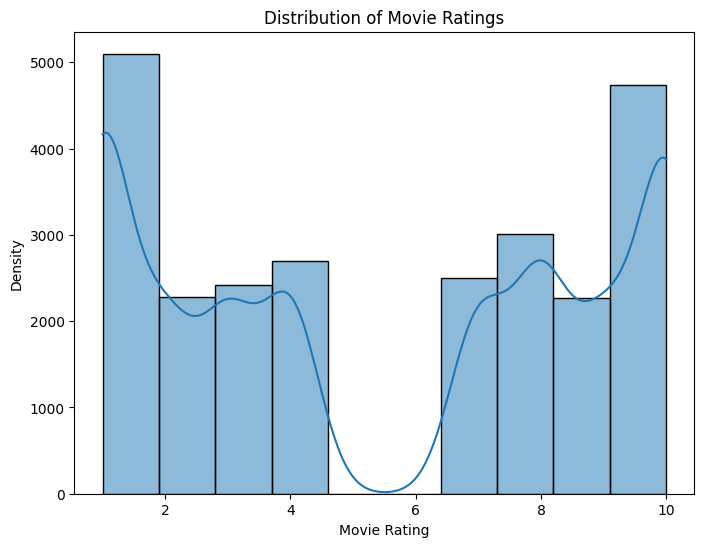

In [20]:
#Movie Rating Distribution

plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='movie_rating', bins=10, kde=True)
plt.xlabel('Movie Rating')
plt.ylabel('Density')
plt.title('Distribution of Movie Ratings')
plt.show()

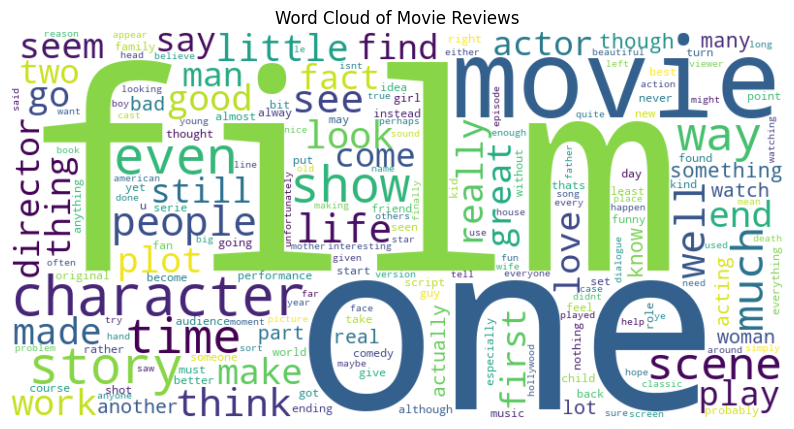

In [21]:
#Word Cloud for Reviews:
from wordcloud import WordCloud

# Combine all reviews into a single string
all_reviews = ' '.join(train_df['no_sw'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Reviews')
plt.show()

In [22]:
#Working with the most Frequent Words: 
from collections import Counter
cnt = Counter()
for text in train_df["no_sw"].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,movie,50589
1,film,46101
2,one,26910
3,like,20142
4,time,15321
5,good,14766
6,character,13993
7,story,12890
8,even,12507
9,get,12449


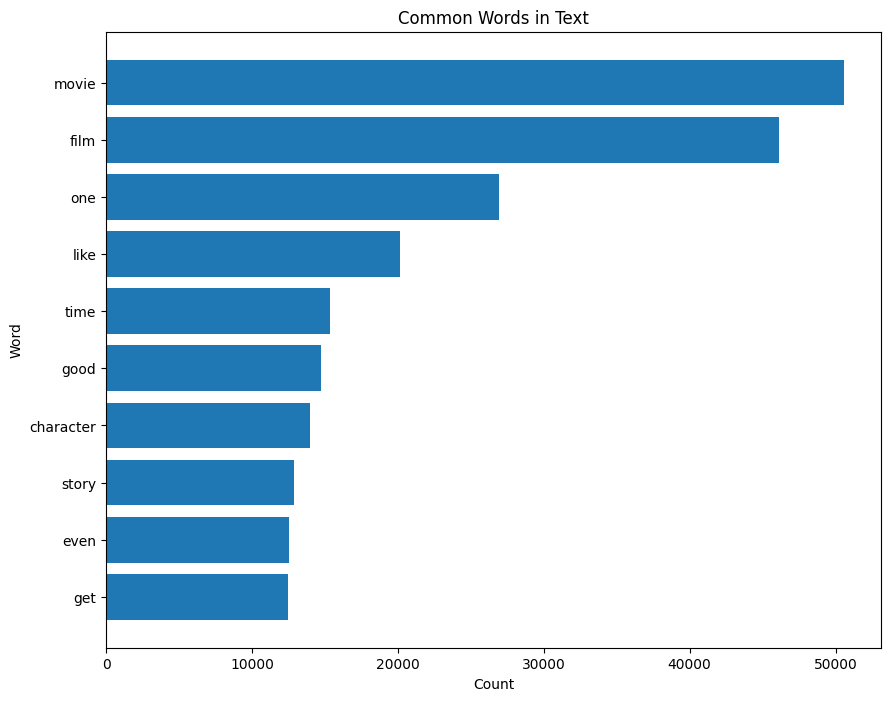

In [23]:
# Plotting with matplotlib (plt)
plt.figure(figsize=(10, 8))
plt.barh(temp['word'], temp['count'])
plt.xlabel('Count')
plt.ylabel('Word')
plt.title('Common Words in Text')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

In [24]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
train_df["wo_stopfreq"] = train_df["no_sw"].apply(lambda text: remove_freqwords(text))
train_df.head()

,Unnamed: 0,movie_id,movie_rating,review,label,no_sw,wo_stopfreq
0,0,tt0064354,3,story man unnatural feeling pig start opening ...,0,story man unnatural feeling pig start opening ...,man unnatural feeling pig start opening scene ...
1,1,tt0100680,1,robert deniro play unbelievably intelligent il...,0,robert deniro play unbelievably intelligent il...,robert deniro play unbelievably intelligent il...
2,2,tt0100680,1,saw capsule comment said great acting opinion ...,0,saw capsule comment said great acting opinion ...,saw capsule comment said great acting opinion ...
3,3,tt0100680,4,read pat barker union street seeing film would...,0,read pat barker union street seeing film would...,read pat barker union street seeing would like...
4,4,tt0047200,4,fanciful horror flick vincent price playing ma...,0,fanciful horror flick vincent price playing ma...,fanciful horror flick vincent price playing ma...


In [25]:
train_df['no_sw'].loc[5]

'basically skimmed movie enough catch watch plot tell truth kind boring spot didnt make sense reason watched movie first place see chace crawford hot movie hair kind weird still hot however despite hot chace really make film guess plot isnt bad really threw fact cuss like every sentence hard express anger without saying f word every timethe cussing annoying whole flashy camera shaking thing gave headache although plot ok found film bore dramatic thats cut scene chace lol anyways worth renting unless diehard fan specific cast member like oh yeah cast hot girl hot chace best'

In [26]:
train_df['wo_stopfreq'].loc[5]

'basically skimmed enough catch watch plot tell truth kind boring spot didnt make sense reason watched first place see chace crawford hot hair kind weird still hot however despite hot chace really make guess plot isnt bad really threw fact cuss every sentence hard express anger without saying f word every timethe cussing annoying whole flashy camera shaking thing gave headache although plot ok found bore dramatic thats cut scene chace lol anyways worth renting unless diehard fan specific cast member oh yeah cast hot girl hot chace best'

In [27]:
# Remove the most frequent words:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])
test_df["wo_stopfreq"] = test_df["no_sw"].apply(lambda text: remove_freqwords(text))
test_df.head()

,Unnamed: 0,review,label,no_sw,wo_stopfreq
0,0,mr costner dragged movie far longer necessary ...,bad,mr costner dragged movie far longer necessary ...,mr costner dragged far longer necessary aside ...
1,1,example majority action film generic boring th...,bad,example majority action film generic boring re...,example majority action generic boring really ...
2,2,first hate moronic rapper couldnt act gun pres...,bad,first hate moronic rapper couldnt act gun pres...,first hate moronic rapper couldnt act gun pres...
3,3,even beatles could write song everyone liked a...,bad,even beatles could write song everyone liked a...,beatles could write song everyone liked althou...
4,4,brass picture movie fitting word really somewh...,bad,brass picture movie fitting word really somewh...,brass picture fitting word really somewhat bra...


In [28]:
# Lemmatization: Lemmatization is converting the word to its base form or lemma by removing affixes from the inflected words. 
# It helps to create better features for machine learning and NLP models hence it is an important preprocessing step.


import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import wordnet

# A helper function to get the part-of-speech tag for lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun

# Lemmatizing each word with its correct part-of-speech
wordnet_lem = WordNetLemmatizer()
train_df['wo_stopfreq_lem'] = train_df['wo_stopfreq'].apply(lambda sentence: ' '.join([wordnet_lem.lemmatize(w, get_wordnet_pos(w)) for w in word_tokenize(sentence)]))

train_df

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\REBU\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\REBU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\REBU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,movie_id,movie_rating,review,label,no_sw,wo_stopfreq,wo_stopfreq_lem
0,0,tt0064354,3,story man unnatural feeling pig start opening ...,0,story man unnatural feeling pig start opening ...,man unnatural feeling pig start opening scene ...,man unnatural feel pig start opening scene ter...
1,1,tt0100680,1,robert deniro play unbelievably intelligent il...,0,robert deniro play unbelievably intelligent il...,robert deniro play unbelievably intelligent il...,robert deniro play unbelievably intelligent il...
2,2,tt0100680,1,saw capsule comment said great acting opinion ...,0,saw capsule comment said great acting opinion ...,saw capsule comment said great acting opinion ...,saw capsule comment say great act opinion two ...
3,3,tt0100680,4,read pat barker union street seeing film would...,0,read pat barker union street seeing film would...,read pat barker union street seeing would like...,read pat barker union street see would like un...
4,4,tt0047200,4,fanciful horror flick vincent price playing ma...,0,fanciful horror flick vincent price playing ma...,fanciful horror flick vincent price playing ma...,fanciful horror flick vincent price play mad m...
...,...,...,...,...,...,...,...,...
24995,24995,tt0433360,7,whats good inventive genuinely creepy little e...,1,whats good inventive genuinely creepy little e...,whats inventive genuinely creepy little effect...,whats inventive genuinely creepy little effect...
24996,24996,tt0433360,8,year weve watching every horror film come dull...,1,year weve watching every horror film come dull...,year weve watching every horror come dull holl...,year weve watch every horror come dull hollywo...
24997,24997,tt0324532,10,havent already seen movie marykate ashleys say...,1,havent already seen movie marykate ashleys say...,havent already seen marykate ashleys say waiti...,havent already see marykate ashleys say wait y...
24998,24998,tt0324532,10,movie best movie ever lot live action great ev...,1,movie best movie ever lot live action great ev...,best ever lot live action great everyone watch...,best ever lot live action great everyone watch...


In [29]:
train_df['wo_stopfreq_lem'].loc[5]

'basically skim enough catch watch plot tell truth kind boring spot didnt make sense reason watch first place see chace crawford hot hair kind weird still hot however despite hot chace really make guess plot isnt bad really threw fact cuss every sentence hard express anger without say f word every timethe cuss annoy whole flashy camera shake thing give headache although plot ok found bore dramatic thats cut scene chace lol anyways worth rent unless diehard fan specific cast member oh yeah cast hot girl hot chace best'

In [30]:
train_df['wo_stopfreq'].loc[5]

'basically skimmed enough catch watch plot tell truth kind boring spot didnt make sense reason watched first place see chace crawford hot hair kind weird still hot however despite hot chace really make guess plot isnt bad really threw fact cuss every sentence hard express anger without saying f word every timethe cussing annoying whole flashy camera shaking thing gave headache although plot ok found bore dramatic thats cut scene chace lol anyways worth renting unless diehard fan specific cast member oh yeah cast hot girl hot chace best'

In [31]:
train_df.to_csv('final_dataset_train1.csv', index=True)

In [32]:
train_df

,Unnamed: 0,movie_id,movie_rating,review,label,no_sw,wo_stopfreq,wo_stopfreq_lem
0,0,tt0064354,3,story man unnatural feeling pig start opening ...,0,story man unnatural feeling pig start opening ...,man unnatural feeling pig start opening scene ...,man unnatural feel pig start opening scene ter...
1,1,tt0100680,1,robert deniro play unbelievably intelligent il...,0,robert deniro play unbelievably intelligent il...,robert deniro play unbelievably intelligent il...,robert deniro play unbelievably intelligent il...
2,2,tt0100680,1,saw capsule comment said great acting opinion ...,0,saw capsule comment said great acting opinion ...,saw capsule comment said great acting opinion ...,saw capsule comment say great act opinion two ...
3,3,tt0100680,4,read pat barker union street seeing film would...,0,read pat barker union street seeing film would...,read pat barker union street seeing would like...,read pat barker union street see would like un...
4,4,tt0047200,4,fanciful horror flick vincent price playing ma...,0,fanciful horror flick vincent price playing ma...,fanciful horror flick vincent price playing ma...,fanciful horror flick vincent price play mad m...
...,...,...,...,...,...,...,...,...
24995,24995,tt0433360,7,whats good inventive genuinely creepy little e...,1,whats good inventive genuinely creepy little e...,whats inventive genuinely creepy little effect...,whats inventive genuinely creepy little effect...
24996,24996,tt0433360,8,year weve watching every horror film come dull...,1,year weve watching every horror film come dull...,year weve watching every horror come dull holl...,year weve watch every horror come dull hollywo...
24997,24997,tt0324532,10,havent already seen movie marykate ashleys say...,1,havent already seen movie marykate ashleys say...,havent already seen marykate ashleys say waiti...,havent already see marykate ashleys say wait y...
24998,24998,tt0324532,10,movie best movie ever lot live action great ev...,1,movie best movie ever lot live action great ev...,best ever lot live action great everyone watch...,best ever lot live action great everyone watch...


In [34]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
def get_ngrams(review, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(review)
    bag_of_words = vec.transform(review) #sparse matrix of count_vectorizer
    sum_words = bag_of_words.sum(axis=0) #total number of words
    sum_words = np.array(sum_words)[0].tolist() #convert to list
    words_freq = [(word, sum_words[idx]) for word, idx in vec.vocabulary_.items()] #get word freqency for word location in count vec
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) #key is used to perform sorting using word_freqency 
    return words_freq[:n]

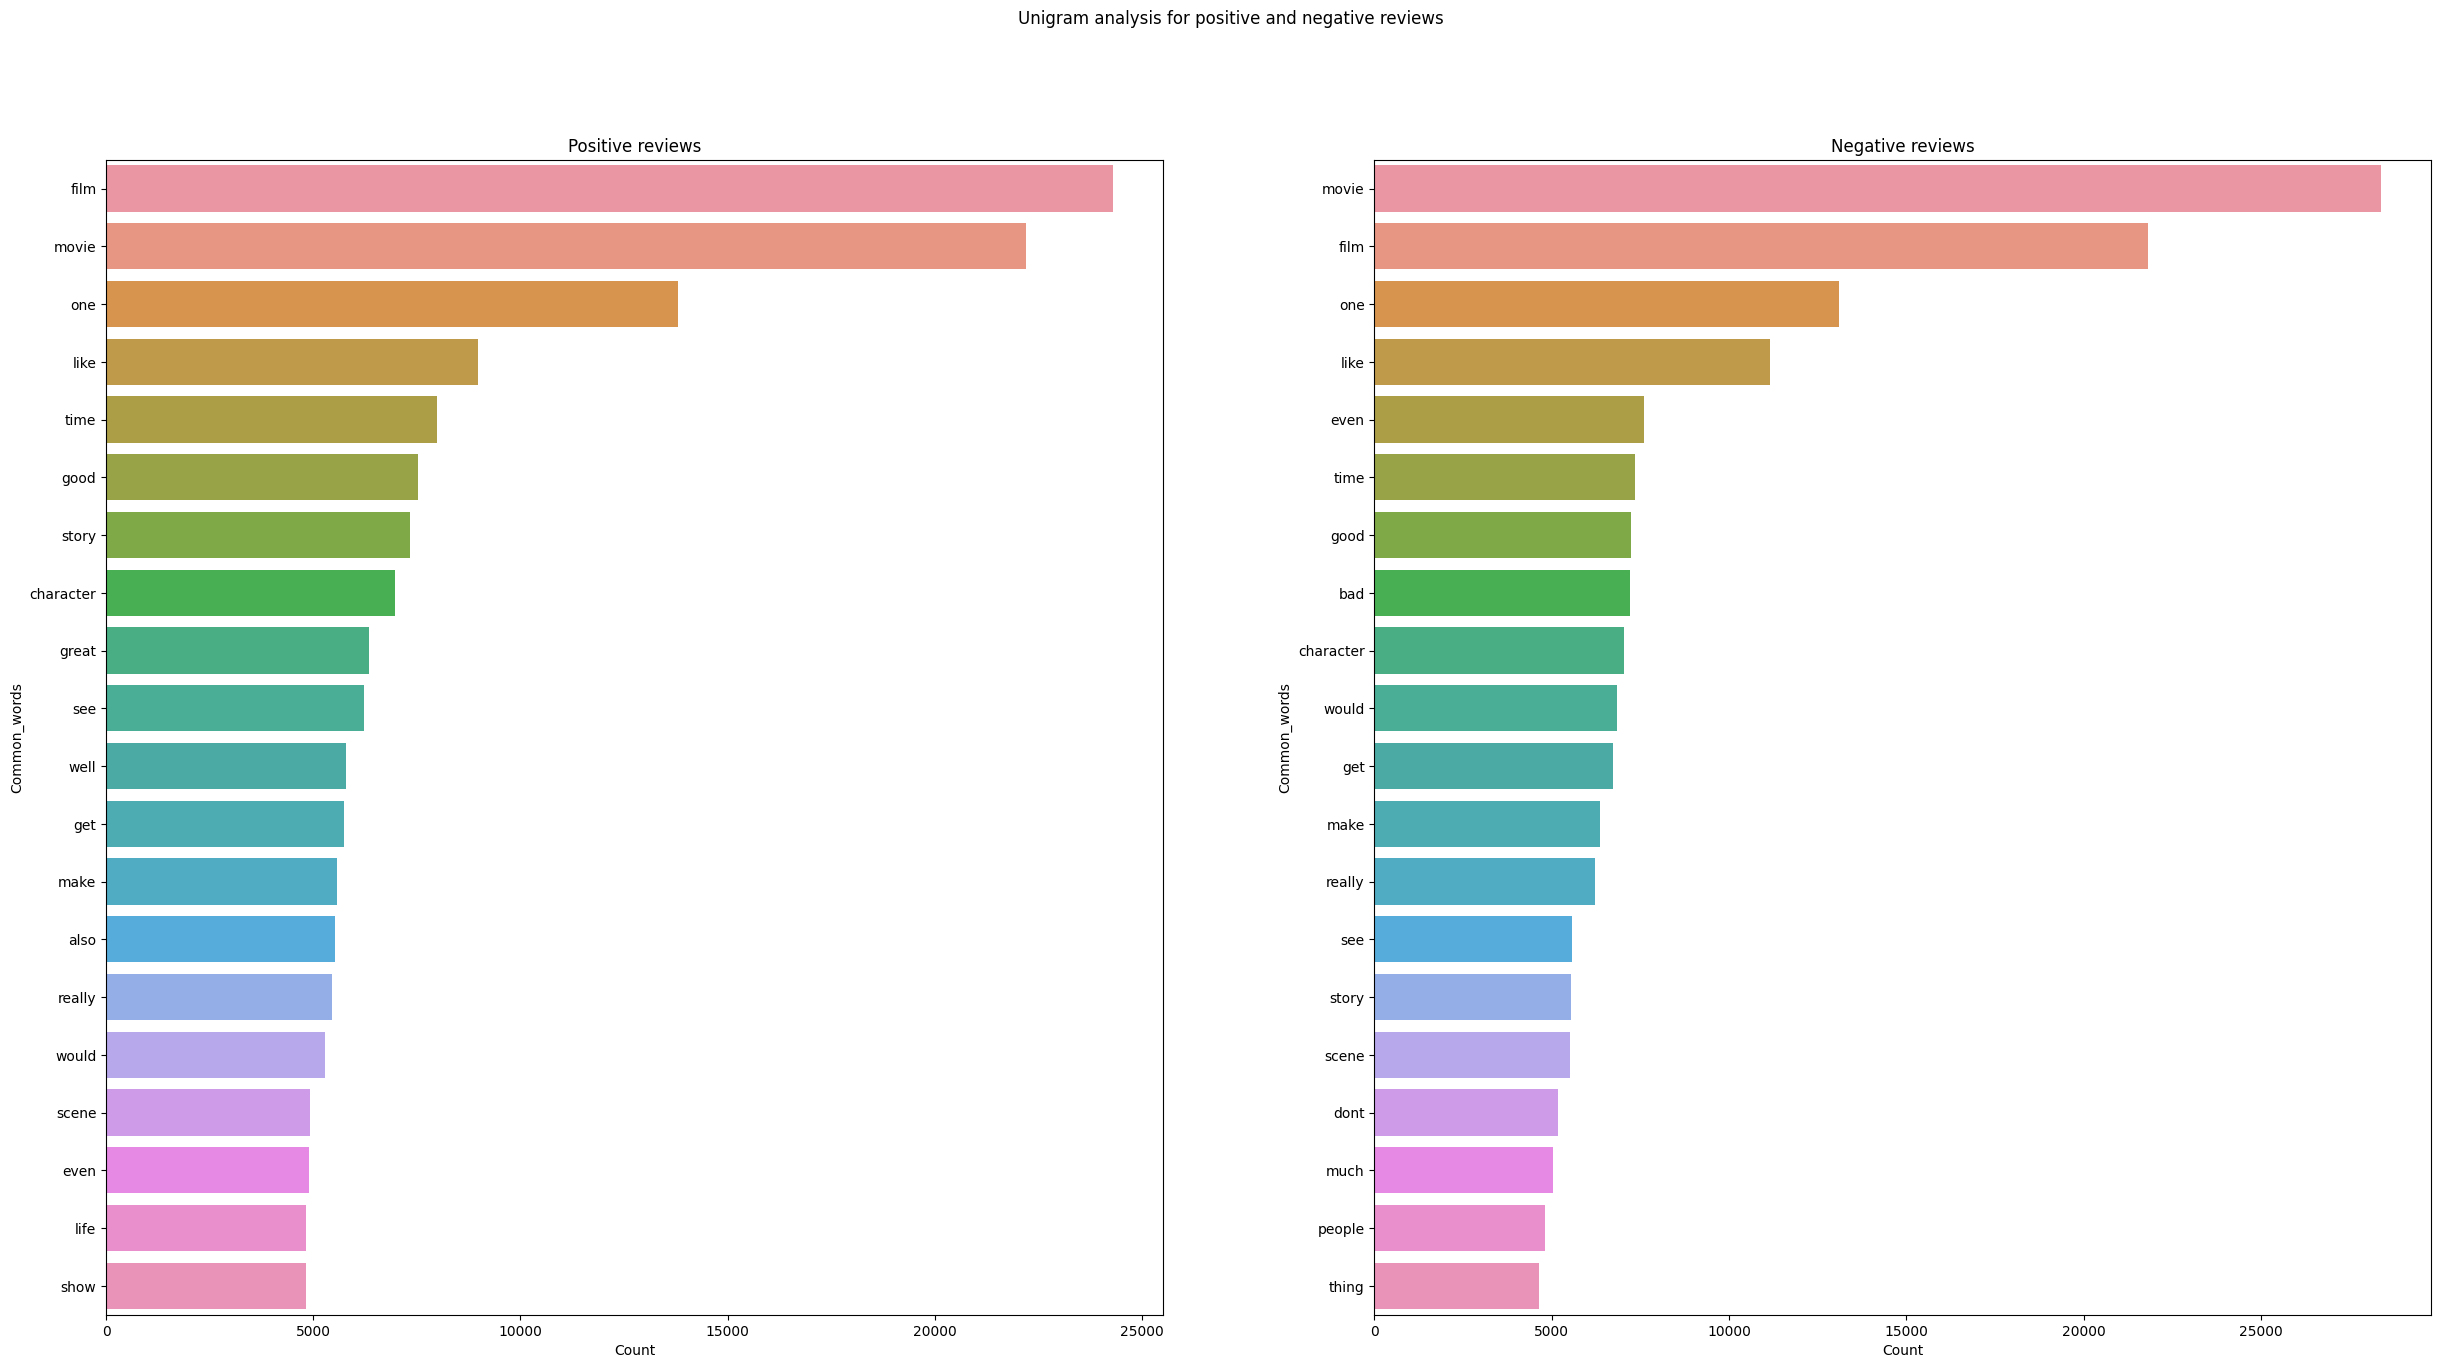

In [35]:
positive_data = train_df[train_df.label == 1]['no_sw']
negative_data = train_df[train_df.label == 0]['no_sw']
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
uni_positive = get_ngrams(positive_data,20,1)
uni_positive = dict(uni_positive)
temp = pd.DataFrame(list(uni_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
uni_negative = get_ngrams(negative_data,20,1)
uni_negative = dict(uni_negative)
temp = pd.DataFrame(list(uni_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Unigram analysis for positive and negative reviews')
plt.show()

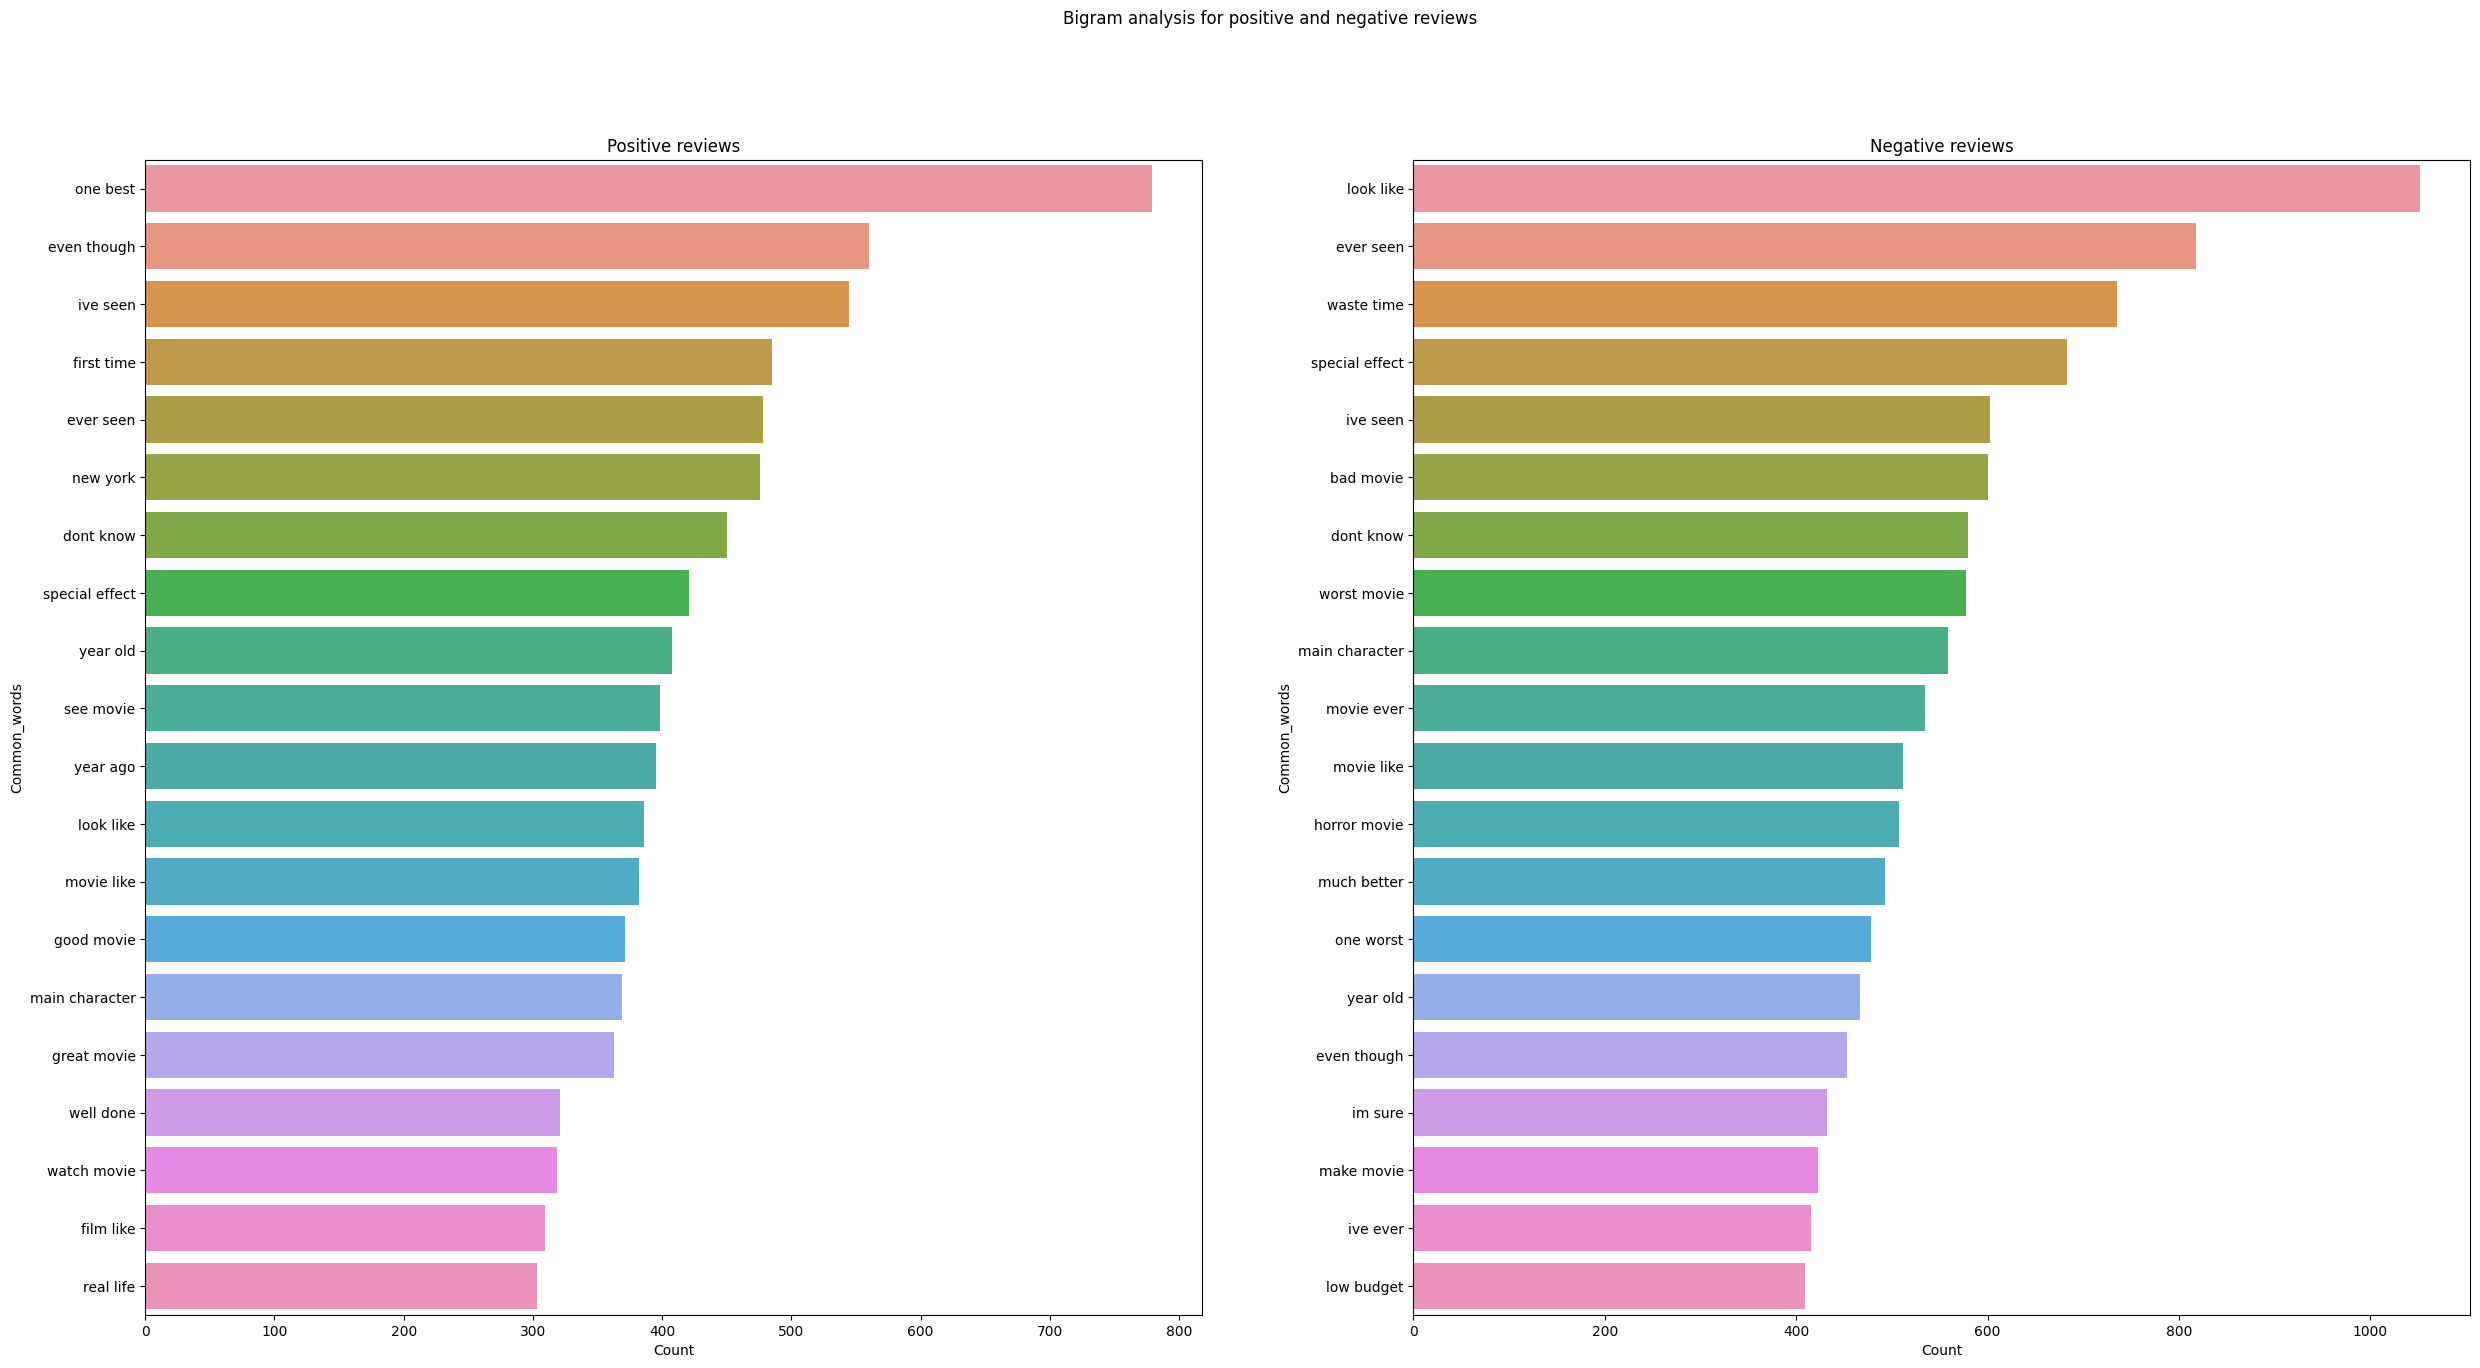

In [36]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
bi_positive = get_ngrams(positive_data,20,2)
bi_positive = dict(bi_positive)
temp = pd.DataFrame(list(bi_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
bi_negative = get_ngrams(negative_data,20,2)
bi_negative = dict(bi_negative)
temp = pd.DataFrame(list(bi_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Bigram analysis for positive and negative reviews')
plt.show()

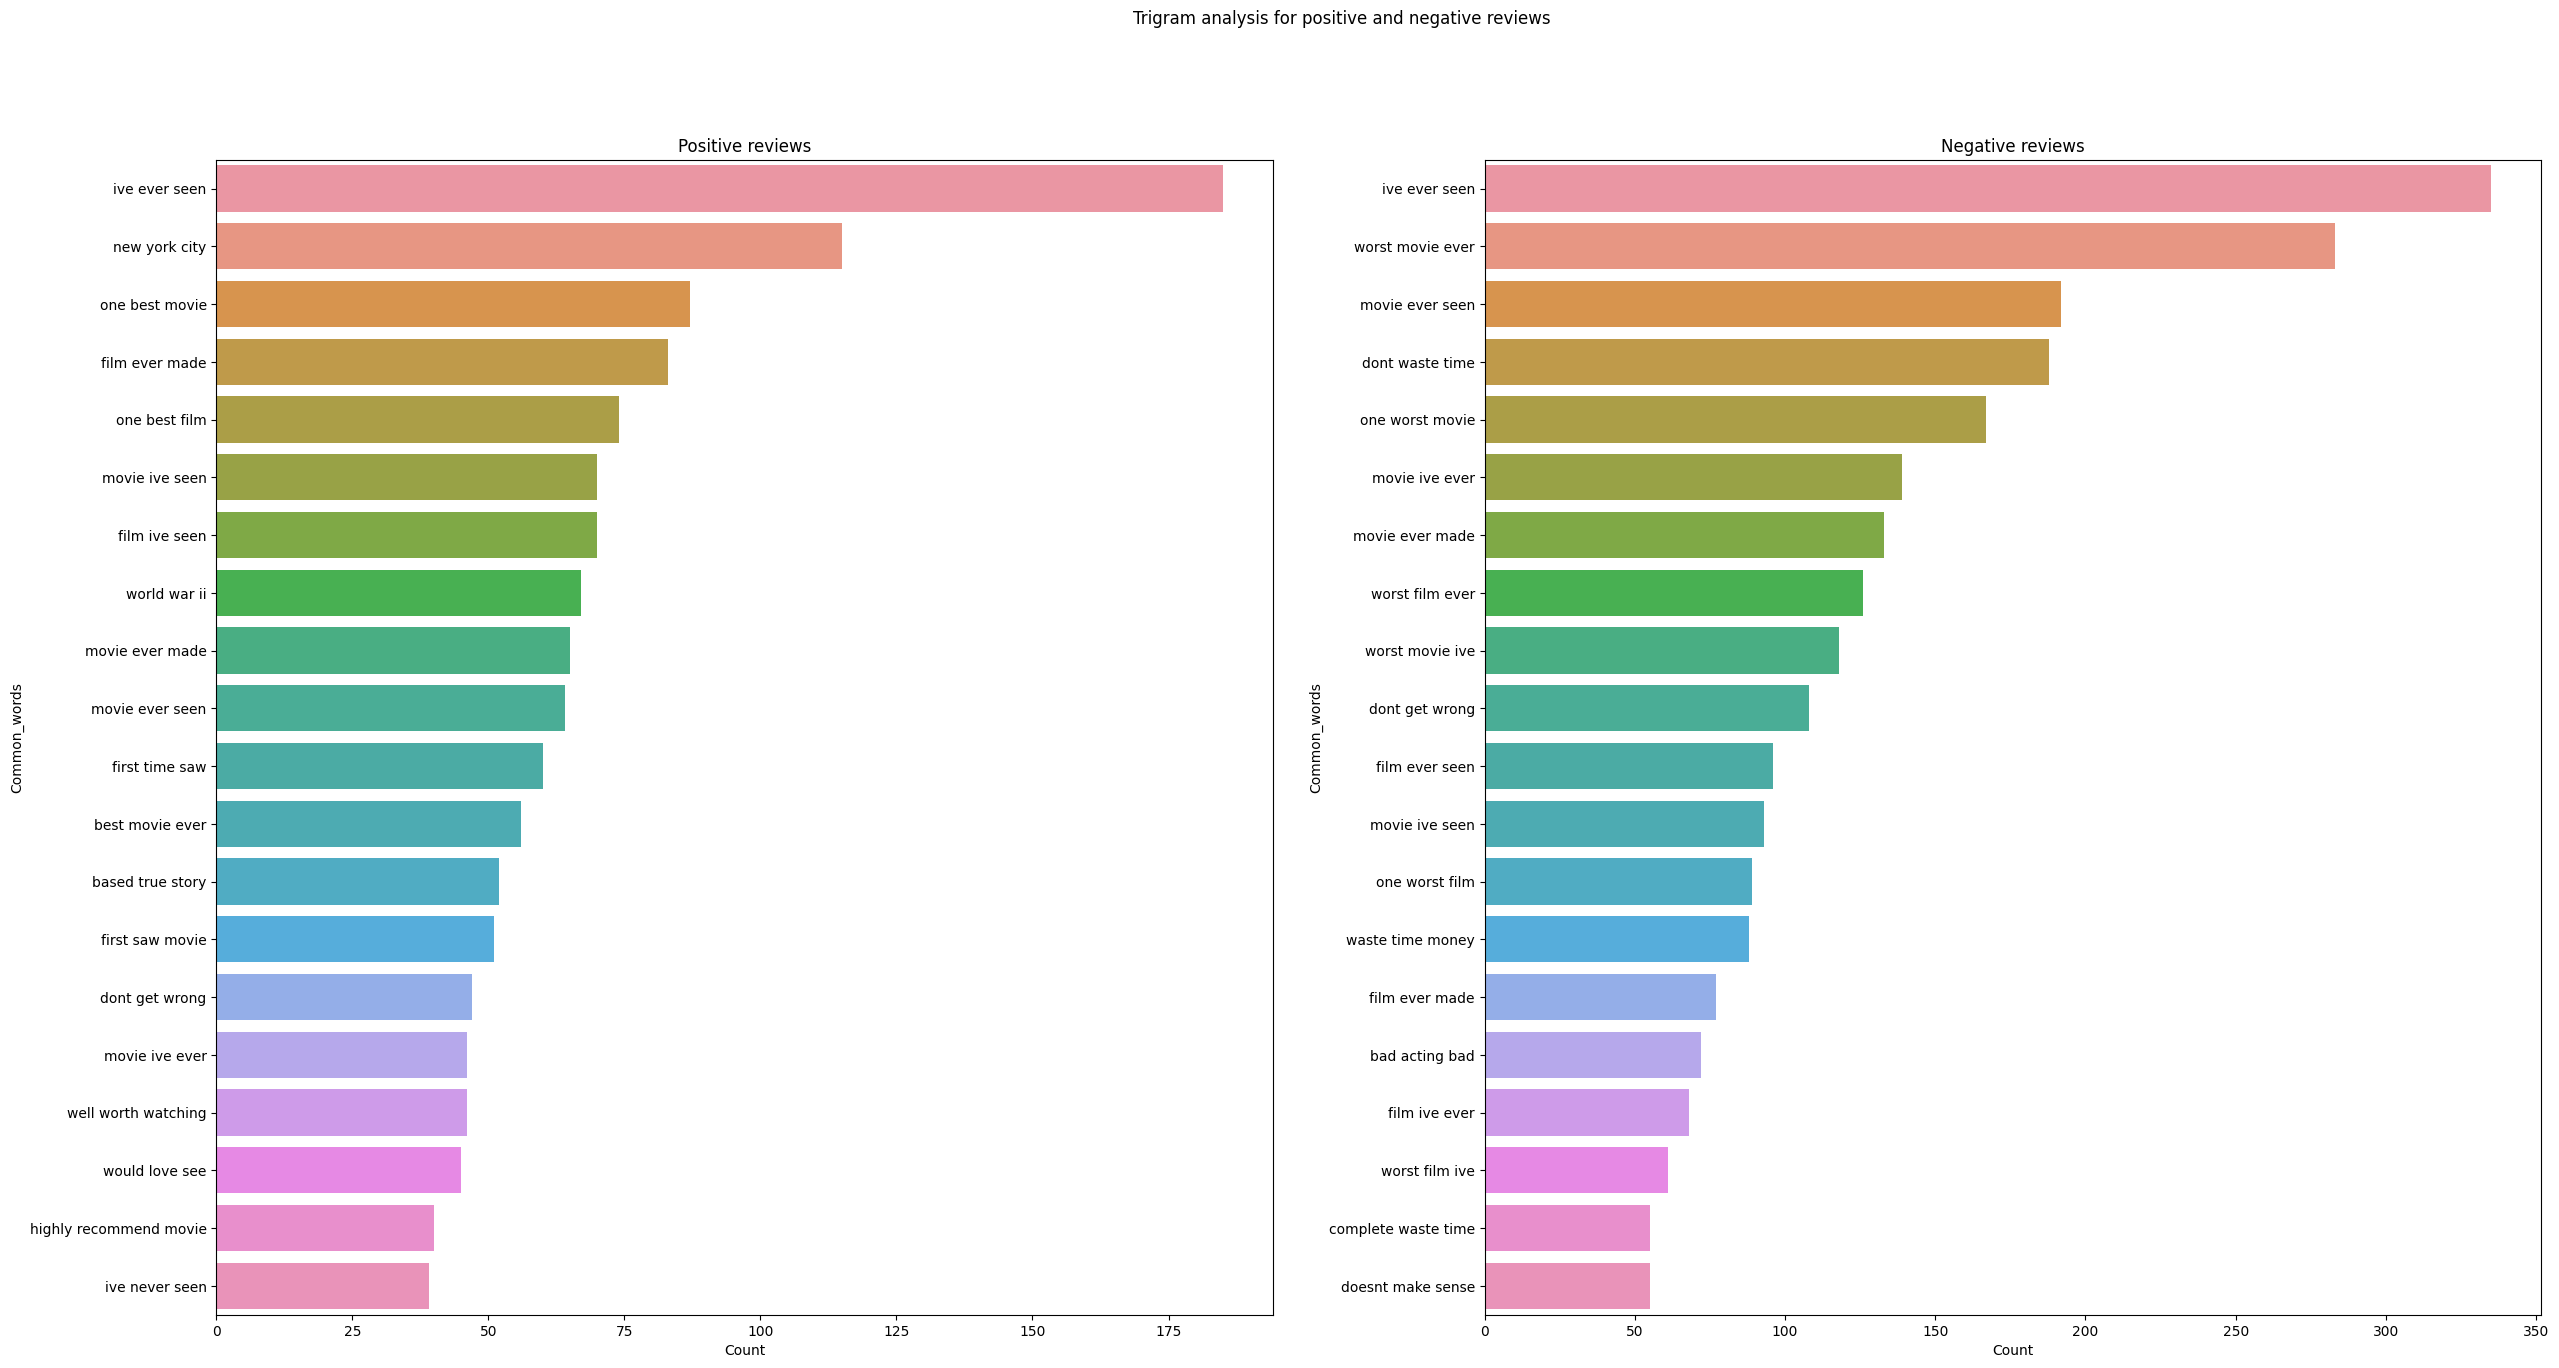

In [37]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(30,15))
tri_positive = get_ngrams(positive_data,20,3)
tri_positive = dict(tri_positive)
temp = pd.DataFrame(list(tri_positive.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax1)
ax1.set_title('Positive reviews')
tri_negative = get_ngrams(negative_data,20,3)
tri_negative = dict(tri_negative)
temp = pd.DataFrame(list(tri_negative.items()), columns = ["Common_words" , 'Count'])
sns.barplot(data = temp, x="Count", y="Common_words", orient='h',ax = ax2)
ax2.set_title('Negative reviews')
fig.suptitle('Trigram analysis for positive and negative reviews')
plt.show()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(train_df['wo_stopfreq_lem'], train_df['label'], test_size=0.2,random_state=0)

In [39]:
[i.shape for i in [X_train, X_test, y_train, y_test] ]

[(20000,), (5000,), (20000,), (5000,)]

In [40]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000,
)

word_vectorizer.fit(train_df['wo_stopfreq_lem'])

tfidf_train = word_vectorizer.transform(X_train)
tfidf_test = word_vectorizer.transform(X_test)

In [41]:
print('Shape of tfidf_train:',tfidf_train.shape)
print('Shape of tfidf_test:',tfidf_test.shape)

Shape of tfidf_train: (20000, 10000)
Shape of tfidf_test: (5000, 10000)


In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve

In [43]:
def display_confusion_matrix_and_metrics(true_labels, predicted_labels):
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    
    # Visualization of the confusion matrix using a heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Oranges',
                xticklabels=['Bad','Good'], 
                yticklabels=['Bad','Good'])
    plt.title(f'Accuracy: {accuracy_score(true_labels, predicted_labels):.4f}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # Printing classification report for further insights
    print("\nClassification Report:")
    print(classification_report(true_labels, predicted_labels))

In [44]:

def plot_roc_auc_curve(true_labels, probabilities):
    
    # Calculate the ROC curve points
    false_positive_rate, true_positive_rate, _ = roc_curve(true_labels, probabilities)
    
    # Calculate the AUC score
    auc_score = roc_auc_score(true_labels, probabilities)
    
    # Plot the ROC curve
    plt.figure(figsize=(16, 9))
    plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline (No Skill)')
    plt.plot(false_positive_rate, true_positive_rate, marker='.', label=f'Model (AUC = {auc_score:.3f})')
    
    # Configure plot aesthetics
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve and AUC Score')
    plt.legend()
    plt.show()

In [45]:
from sklearn.svm import SVC
# Initialize SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

In [46]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores_accuracy = cross_val_score(svm_classifier, tfidf_train, y_train, cv=5, scoring='accuracy')
cv_scores_precision = cross_val_score(svm_classifier, tfidf_train, y_train, cv=5, scoring='precision')
cv_scores_recall = cross_val_score(svm_classifier, tfidf_train, y_train, cv=5, scoring='recall')
cv_scores_f1 = cross_val_score(svm_classifier, tfidf_train, y_train, cv=5, scoring='f1')

In [47]:
# Print cross-validation scores
print("Cross-Validation Accuracy:", cv_scores_accuracy.mean())
print("Cross-Validation Precision:", cv_scores_precision.mean())
print("Cross-Validation Recall:", cv_scores_recall.mean())
print("Cross-Validation F1-score:", cv_scores_f1.mean())

Cross-Validation Accuracy: 0.87715
Cross-Validation Precision: 0.8691063513493387
Cross-Validation Recall: 0.8879559279639819
Cross-Validation F1-score: 0.8784231117936461


In [48]:
# Train the SVM classifier on the entire training data
svm_classifier.fit(tfidf_train, y_train)

SVC(kernel='linear')

In [49]:
# Predict on training and testing sets
train_predictions = svm_classifier.predict(tfidf_train)
test_predictions = svm_classifier.predict(tfidf_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)


In [50]:
# Output model performance metrics
print(f'Recall Score: {recall_score(y_train, train_predictions):.4f}')
print(f'Precision Score: {precision_score(y_train, train_predictions):.4f}')
print(f'F1 Score: {f1_score(y_train, train_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_train, train_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_train, train_predictions):.4f}')

Recall Score: 0.9521
Precision Score: 0.9402
F1 Score: 0.9461
Accuracy Score: 0.9458
AUC Score: 0.9458


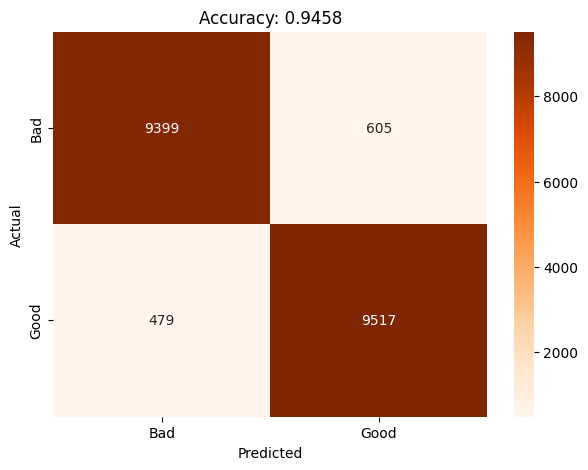


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10004
           1       0.94      0.95      0.95      9996

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [51]:
# Train Predictions
display_confusion_matrix_and_metrics(y_train, train_predictions)

In [52]:
# Test Data Performance Metrics
print(f'Recall Score: {recall_score(y_test, test_predictions):.4f}')
print(f'Precision Score: {precision_score(y_test, test_predictions):.4f}')
print(f'F1 Score: {f1_score(y_test, test_predictions):.4f}')
print(f'Accuracy Score: {accuracy_score(y_test, test_predictions):.4f}')
print(f'AUC Score: {roc_auc_score(y_test, test_predictions):.4f}')

Recall Score: 0.8866
Precision Score: 0.8730
F1 Score: 0.8797
Accuracy Score: 0.8786
AUC Score: 0.8786


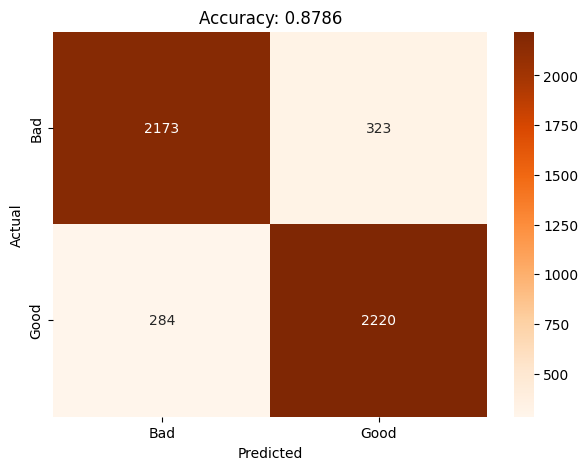


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      2496
           1       0.87      0.89      0.88      2504

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



In [53]:
# Test Data Predictions
display_confusion_matrix_and_metrics(y_test, test_predictions)

In [58]:
import joblib
# Save the model
joblib.dump(svm_classifier, 'svm_model.h5')

['svm_model.h5']